In [ ]:
# Install required libraries
!pip install emoji

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# read text from file 
file_location = './drive/MyDrive/WhatsApp Chat with "Ohhhhkkkk Unofficial"😎😎.txt'
with open(file_location) as f:
  data = f.read()
  data = ' '.join(data.split('\n'))

#separate user messages and datetime of the chat
import re
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
user_messages = re.split(pattern, data)[1:]
message_dates =  re.findall(pattern, data)
print(data)
print(user_messages)
# print(message_dates)
# load user messages and dates into dataframe
import pandas as pd
df = pd.DataFrame({'user_message':user_messages, 'message_date': message_dates})
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')

df.rename(columns={'message_date': 'date'}, inplace=True)

# separate users and messages 
users = []
messages = []
for message in df['user_message']:
  entry = re.split('([\w\W]+?):\s', message)
  if entry[1:]:# user name
    users.append(entry[1])
    messages.append(entry[2])
  else:
    users.append('group_notification')
    messages.append(entry[0])

df['user'] =  users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

print(df.tail())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                     date  ...                                            message
39994 2022-02-07 16:15:00  ...                                   <Media omitted> 
39995 2022-02-07 16:16:00  ...   Python programa and data sets for external exam 
39996 2022-02-07 21:19:00  ...  Guys!! Those who all posted the assignments of...
39997 2022-02-07 21:20:00  ...  Mam will not be considering the pdfs which are...
39998 2022-02-07 21:20:00  ...                                             Ok cr 

[5 rows x 3 columns]


In [ ]:
# data cleaning 
# 1. remove all the <Media omitted> messages
images = df[df['message'] == '<Media omitted> ']
print("Total number of Images + Videos Shared: ", len(images))
df.drop(images.index, inplace=True)
# 2. remove all group notifications
notifications = df[df['user'] == 'group_notification']
print("Total Group Notifications: ", len(notifications))
df.drop(notifications.index, inplace=True)

# reset the index 
df.reset_index(inplace=True, drop=True)
df.tail()

Total number of Images + Videos Shared:  0
Total Group Notifications:  0


,date,user,message
32818,2022-02-07 14:43:00,Reshmitha Vnr,
32819,2022-02-07 16:16:00,N Sreeja Vnr,Python programa and data sets for external exam
32820,2022-02-07 21:19:00,Rushika Vnr,Guys!! Those who all posted the assignments of...
32821,2022-02-07 21:20:00,Rushika Vnr,Mam will not be considering the pdfs which are...
32822,2022-02-07 21:20:00,Jai Shree Vnr Csbs,Ok cr


# 1. Who is most active in the group 

In [ ]:
df.groupby('user')['message'].count().sort_values(ascending=False)

user
N Sreeja Vnr              3747
Tanmayi Vnr               3683
Anjali Vnr                3682
Venkat Sai Vnr            3310
Sarath Vnr                2470
                          ... 
Shivesh Vnr 2                5
Mihir Csbs Senior            4
+91 94408 92737              4
Praveen Csi Senior Vnr       3
Yashwanth Vnr                1
Name: message, Length: 75, dtype: int64

# 2. Frequently used emojis in the group

In [ ]:
import emoji
from collections import Counter
# Count all the emojis in the chat.
emoji_counter = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI['en'].keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for index, row in df.iterrows():
  emojis_found = r.findall(row['message'])
  for emoji_f in emojis_found:
    emoji_counter[emoji_f] +=1

for item in emoji_counter.most_common(10):
  print(f'{item[0]} - {item[1]}')


😂 - 8424
🤣 - 1327
🥳 - 996
🏻 - 693
🔥 - 653
🤭 - 471
🎉 - 416
🙄 - 388
👍 - 377
😭 - 360


# 3. Sleep Cycles of the group

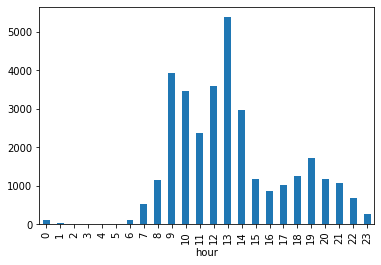

In [ ]:
#3 sleep cycle 
df['hour'] = df['date'].apply(lambda x: x.hour)
df.groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

# 4. Word Cloud

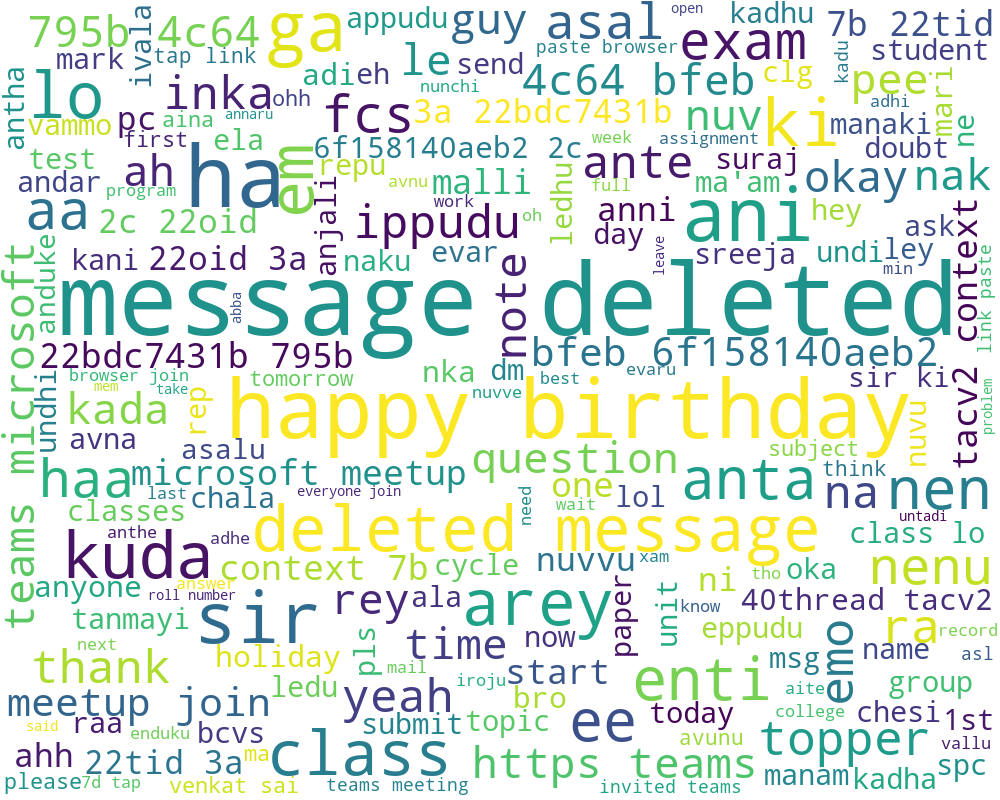

In [ ]:
from wordcloud import WordCloud, STOPWORDS
all_words = ' '
stopwords = STOPWORDS.update(['re', 'mam', 'python', 'yes', 'no', 'how', 'sem', 'mids', 'lab', 'external', 'satwik', 'hi', 'bye', 'ok', 'will'])
for msg in df['message'].values:
  words = str(msg).lower().split()
  for word in words:
    all_words = all_words + word + ' '

wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_words) 


wordcloud.to_image()